## 3표본 이항(비율) 차이분석 ==> chi-square test

In [2]:
# -*- coding: utf-8 -*-
#컨벤션
%matplotlib inline
from pandas import DataFrame, Series
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels
import math

In [3]:
#skipinitialspace 컬럼의 빈칸 없애고 전체 자료 읽어 들이기
my_df = pd.read_csv('coupon2.csv', skipinitialspace=True)

In [4]:
#변수 확인
print(my_df.head())
print(my_df.tail())
print(my_df.info())
print(my_df.describe())

    no  type  category    amount  week
0   42     1       1.0  159000.0   1.0
1  194     1       1.0  154000.0   1.0
2  180     1       1.0  135000.0   1.0
3   47     1       1.0  128000.0   1.0
4  207     1       2.0  129000.0   1.0
      no  type  category  amount  week
295  285     3       NaN     NaN   NaN
296  286     3       NaN     NaN   NaN
297  292     3       NaN     NaN   NaN
298  293     3       NaN     NaN   NaN
299  297     3       NaN     NaN   NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
no          300 non-null int64
type        300 non-null int64
category    156 non-null float64
amount      156 non-null float64
week        156 non-null float64
dtypes: float64(3), int64(2)
memory usage: 11.8 KB
None
               no        type    category         amount       week
count  300.000000  300.000000  156.000000     156.000000  156.00000
mean   150.500000    2.073333    2.371795   83358.974359    0.50000
std    

In [6]:
#response 파생변수 컬럼에 추가하기
my_df['response'] = [0 if np.isnan(x) else 1 for x in my_df.amount]
my_df[['amount','response']]

,amount,response
0,159000.0,1
1,154000.0,1
2,135000.0,1
3,128000.0,1
4,129000.0,1
5,125000.0,1
6,128000.0,1
7,121000.0,1
8,130000.0,1
9,121000.0,1


In [7]:
#파생변수 빈도분석
my_df.response.value_counts(normalize=False, sort=False)

0    144
1    156
Name: response, dtype: int64

In [8]:
my_df.response.value_counts(normalize=True, sort=False)

0    0.48
1    0.52
Name: response, dtype: float64

In [10]:
#레이블 선언
response_lables = {0: 'not used', 1: 'used'}
type_lables = {1: 'discount', 2: 'mileage', 3: 'plusone'}

In [8]:
my_df.type.value_counts(normalize=False, sort=False)

1     89
2    100
3    111
Name: type, dtype: int64

In [9]:
my_df.type.value_counts(normalize=True, sort=False)

1    0.296667
2    0.333333
3    0.370000
Name: type, dtype: float64

In [17]:
my_df_cross = pd.crosstab(my_df.type, my_df.response, margins=True)
print(my_df_cross)
#my_df_cross.columns = response_lables.values()
#my_df_cross.index = type_lables.values()

response    0    1  All
type                   
1          37   52   89
2          48   52  100
3          59   52  111
All       144  156  300


In [11]:
#총계합을 제외하고 교차테이블 생성
my_df_cross_noma = pd.crosstab(my_df.type, my_df.response, margins=False)
my_df_cross_noma

response,0,1
type,,
1,37,52
2,48,52
3,59,52


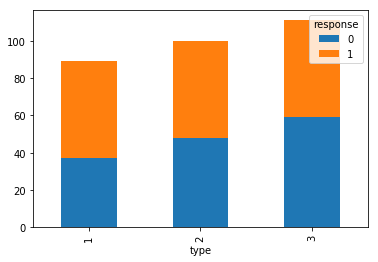

In [12]:
my_df_cross_noma.plot(kind = 'bar', stacked = 1)

In [13]:
my_df_cross = pd.crosstab(my_df.type, my_df.response, margins=False)
my_df_cross

response,0,1
type,,
1,37,52
2,48,52
3,59,52


In [14]:
pd.crosstab(my_df.type, my_df.response, margins=False, normalize='index')

response,0,1
type,,
1,0.415730,0.584270
2,0.480000,0.520000
3,0.531532,0.468468


In [15]:
#세집단 비율차이 검정
stats.chi2_contingency(my_df_cross, correction=True, lambda_=None)
(a, b, c, d) = stats.chi2_contingency(my_df_cross, correction=True, lambda_=None)
print('Chi = %4.3f, p-value = %4.3f, df = %0.0d' % (a, b, c))

Chi = 2.654, p-value = 0.265, df = 2


## end of documents